<a href="https://colab.research.google.com/github/tusharsuthar4828/DataScience_Assigments/blob/main/DecisionTrees_CompanyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [3]:
company = pd.read_csv('/content/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company['ShelveLoc'] = pd.to_numeric(company['ShelveLoc'], errors='coerce')

In [5]:
company['Urban'] = pd.to_numeric(company['Urban'], errors='coerce')


In [6]:
company.isna().sum()

Sales            0
CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc      400
Age              0
Education        0
Urban          400
US               0
dtype: int64

In [7]:
company.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
del company['ShelveLoc']

In [9]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
Urban          float64
US              object
dtype: object

In [10]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [11]:
# Complete Company dataset
label_encoder = preprocessing.LabelEncoder()
company['US'] = label_encoder.fit_transform(company['US'])

In [12]:
label_encoder = preprocessing.LabelEncoder()
company['Urban'] = label_encoder.fit_transform(company['Urban'])

In [13]:
company['US']

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int64

In [14]:
company['Urban']


0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: Urban, Length: 400, dtype: int64

In [15]:
company['US'].value_counts()

1    258
0    142
Name: US, dtype: int64

In [16]:
x = company.iloc[:,0:10]
y = company['US']

In [17]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1
1,11.22,111,48,16,260,83,65,10,0,1
2,10.06,113,35,10,269,80,59,12,0,1
3,7.40,117,100,4,466,97,55,14,0,1
4,4.15,141,64,3,340,128,38,13,0,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,0,1
398,5.94,100,79,7,284,95,50,12,0,1


In [18]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int64

In [19]:
company['US'].unique()

array([1, 0])

In [20]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US']

In [21]:
# splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)

In [22]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
85,8.47,125,103,0,304,112,49,13,0,0
69,7.99,127,59,0,339,99,65,12,0,0
203,2.05,131,82,0,132,157,25,14,0,0
379,5.81,125,111,0,404,107,54,15,0,0
261,5.71,121,42,4,188,118,54,15,0,1
...,...,...,...,...,...,...,...,...,...,...
306,4.78,131,32,1,85,133,48,12,0,1
165,0.37,147,58,7,100,191,27,15,0,1
7,11.85,136,81,15,425,120,67,10,0,1
219,10.62,116,79,19,359,116,58,17,0,1


In [23]:
y_train

85     0
69     0
203    0
379    0
261    1
      ..
306    1
165    1
7      1
219    1
326    0
Name: US, Length: 320, dtype: int64

In [24]:
x_test

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
132,9.54,125,87,9,232,136,72,10,0,1
390,5.47,108,75,9,61,111,67,12,0,1
310,9.53,175,65,29,419,166,53,12,0,1
3,7.40,117,100,4,466,97,55,14,0,1
248,5.36,111,52,0,12,101,61,11,0,1
...,...,...,...,...,...,...,...,...,...,...
361,8.68,131,25,10,183,104,56,15,0,1
197,2.52,124,61,0,333,138,76,16,0,0
23,5.87,121,31,0,292,109,79,10,0,0
54,4.90,134,103,13,25,144,76,17,0,1


In [25]:
y_test

132    1
390    1
310    1
3      1
248    1
      ..
361    1
197    0
23     0
54     1
58     1
Name: US, Length: 80, dtype: int64

In [26]:
#Building Decision Tree Classifier using Entropy Criteria

In [27]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

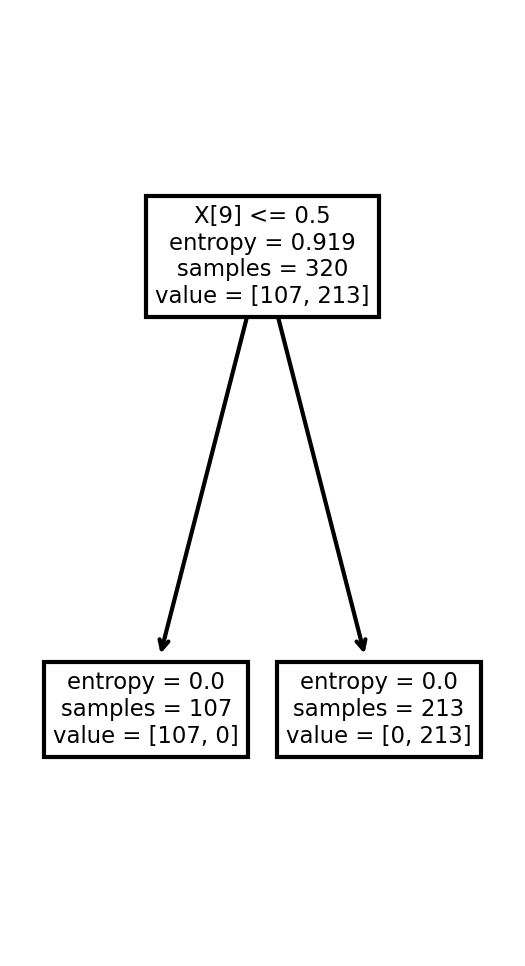

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,4), dpi = 300)
# plot the decision tree
tree.plot_tree(model);

In [29]:
# 0 label = No
# 1 label = Yes

# Predicting on test data
preds = model.predict(x_test) #predicting on test dataset
pd.Series(preds).value_counts() # getting the count of each category

1    45
0    35
dtype: int64

In [30]:
preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [31]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
US,,
0,35,0
1,0,45


In [32]:
# Accuracy
np.mean(preds == y_test)

1.0

In [33]:
#Building Decision Tree classifier (CART) Using GINI criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
# Prediction and computing the accuracy
pred = model_gini.predict(x_test)
np.mean(preds == y_test)

1.0

In [37]:
#Decision Tree Regression Example

In [38]:
#Decision tree regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
array = company.values
X = array[:,0:9]
Y = array[:,9]


In [41]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,0,1
1,11.22,111,48,16,260,83,65,10,0,1
2,10.06,113,35,10,269,80,59,12,0,1
3,7.40,117,100,4,466,97,55,14,0,1
4,4.15,141,64,3,340,128,38,13,0,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,0,1
398,5.94,100,79,7,284,95,50,12,0,1


In [42]:
# Urban column - Dependent Variable
Y

array([1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0.

In [43]:
# splitting data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state= 1)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(268, 9)
(132, 9)
(268,)
(132,)


In [45]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
model.score(X_train, Y_train)

1.0

In [47]:
# Find the accuracy
model.score(X_test, Y_test)

-0.0189473684210526